In [9]:
import pandas as pd
import os
%pylab inline
import json
from pandas.io.json import json_normalize
import altair as alt
alt.renderers.enable('notebook', embed_options={'actions': True})

Populating the interactive namespace from numpy and matplotlib


/home/sebas/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


RendererRegistry.enable('notebook')

In [10]:
json_results = []
folder="all_models_30_08_2019e/"
for f in os.listdir(folder):
    json_results.append(json.load(open(folder+"/"+f)))

In [11]:
#json_results = json.load(open("results/2019_07_11_20_22_06_ALL_MODEL.json"))
df = pd.DataFrame(json_results)
df.columns=["horizon","method",2,3]
for i,feature in enumerate(["rmse","mae","bias","corr","crps"]):
    df[feature]=df[2].apply(lambda e:e[feature])
df.drop([2,3],axis=1,inplace=True)

rf_knn = pd.DataFrame()
for i,feature in enumerate(["rmse","mae","bias","corr","crps"]):
    dtemp=df[["horizon","method",feature]].copy()
    dtemp["value"]=dtemp[feature]
    dtemp["feature"]=feature
    rf_knn=pd.concat([rf_knn,dtemp[["horizon","method","value","feature"]]])

rf_knn.head()

,horizon,method,value,feature
0,50,QGBL,16.131636,rmse
1,38,QKNNL,32.485057,rmse
2,57,QGB,23.123950,rmse
3,30,QGBL,13.766377,rmse
4,14,QRF,35.072505,rmse


In [12]:
prev = pd.read_csv("xarima.csv",header=None)
prev.columns = ["horizon","value","feature"]
prev=prev[prev["horizon"]>0]
prev["method"]="Arima"
prev.head()

,horizon,value,feature,method
1,1,6.18,crps,Arima
2,2,6.20,crps,Arima
3,3,6.02,crps,Arima
4,4,5.76,crps,Arima
5,5,5.43,crps,Arima


In [13]:
all_df = pd.concat([rf_knn,prev],ignore_index=True)

/home/sebas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [14]:
all_df["method"].unique()

array(['QGBL', 'QKNNL', 'QGB', 'QRF', 'QRFL', 'QLR', 'QKNN', 'Arima'],
      dtype=object)

In [15]:
import seaborn as sns

In [16]:
methods = [ 'QGB', 'QRF', 'QLR', 'QKNN', 'QRFL','QKNNL',]
current_palette = sns.color_palette().as_hex()[:len(methods)]
palette = dict(zip(methods,current_palette))

''

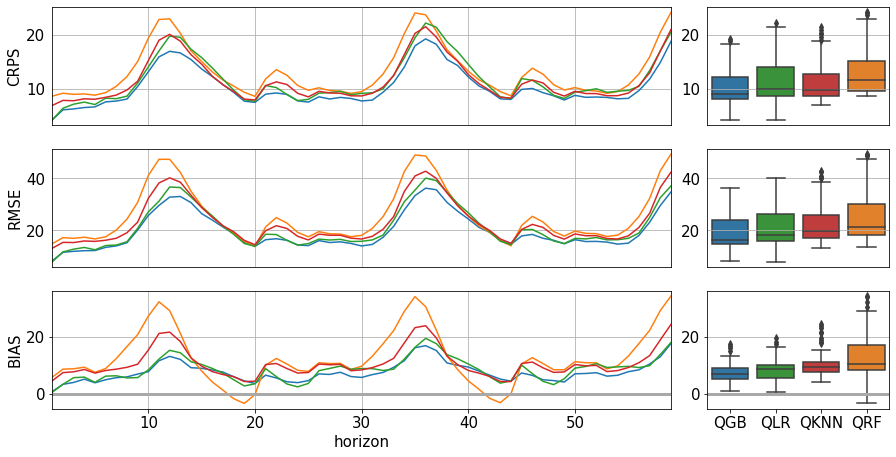

In [17]:
import seaborn as sns

all_df_o=all_df.copy()
#choice = all_df["method"].unique()
#choice = ["QLR","GB","RF","KNN"]
choice = ["QGB","QLR","QKNN","QRF"]
#choice = ["QGB","QLR","QKNNL","QRFL"]
#choice = ["GB","QGBL"]
#choice = ["QGB","QGBL","Arima"]
#choice = ["RFL","RF","QLR"]
#choice = ["QLR","RF"]
#choice = all_df["method"].unique()
all_dfg = all_df[all_df["method"].isin(choice)].copy()

plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(15,10))

#_____________________________________________

plt.subplot2grid((4, 4), (0, 0), colspan=3)

sns.lineplot(x="horizon", y="value",hue="method",palette=palette, data=all_dfg[all_dfg["feature"]=="crps"])

plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(True)
plt.gca().axes.set_xlim(1, 59)

plt.tick_params(axis='both', left=False, bottom=False, labelbottom=False,)

plt.ylabel("CRPS")
plt.xlabel("")

plt.legend().set_visible(False)

#_____________________________________________

plt.subplot2grid((4, 4), (0, 3))

sns.boxplot(data=all_dfg[all_dfg["feature"]=="crps"],x="method",y="value",hue="method",palette=palette, 
            dodge=False,order=choice)

plt.gca().yaxis.grid(True)

plt.tick_params(axis='both', left=False, bottom=False, labelbottom=False,)

plt.ylabel("")
plt.xlabel("")
plt.legend().set_visible(False)

#_____________________________________________

plt.subplot2grid((4, 4), (1, 0), colspan=3)

sns.lineplot(x="horizon", y="value",hue="method",palette=palette, data=all_dfg[all_dfg["feature"]=="rmse"])

plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(True)
plt.gca().axes.set_xlim(1, 59)

plt.tick_params(axis='both', left=False, bottom=False, labelbottom=False,)

plt.ylabel("RMSE")
plt.xlabel("")

plt.legend().set_visible(False)

#_____________________________________________

plt.subplot2grid((4, 4), (1, 3))

sns.boxplot(data=all_dfg[all_dfg["feature"]=="rmse"],x="method",y="value",hue="method",palette=palette,
            order=choice, dodge=False)

plt.gca().yaxis.grid(True)

plt.tick_params(axis='both', left=False, bottom=False, labelbottom=False,)

plt.ylabel("")
plt.xlabel("")
plt.legend().set_visible(False)

#_____________________________________________

plt.subplot2grid((4, 4), (2, 0), colspan=3)

sns.lineplot(x="horizon", y="value",hue="method",palette=palette, data=all_dfg[all_dfg["feature"]=="bias"])
plt.axhline(y=0,color="darkgrey",linewidth=3)

plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(True)
plt.gca().axes.set_xlim(1, 59)

plt.ylabel("BIAS")
plt.xlabel("horizon")

plt.legend().set_visible(False)

#_____________________________________________


plt.subplot2grid((4, 4), (2, 3))

sns.boxplot(data=all_dfg[all_dfg["feature"]=="bias"],x="method",y="value",hue="method",palette=palette,order=choice
            , dodge=False)
plt.axhline(y=0,color="darkgrey",linewidth=3)

plt.gca().yaxis.grid(True)

plt.ylabel("")
plt.xlabel("")
plt.legend().set_visible(False)

;

''

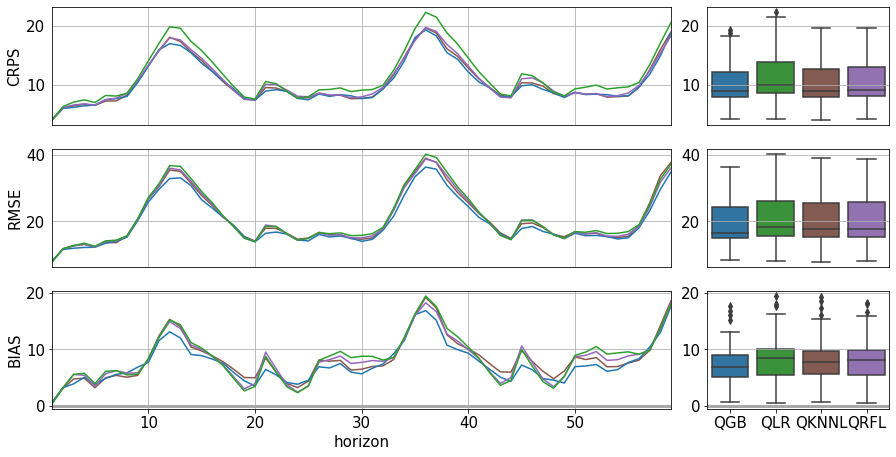

In [18]:
import seaborn as sns

all_df_o=all_df.copy()
#choice = all_df["method"].unique()
#choice = ["QLR","GB","RF","KNN"]
choice = ["QGB","QLR","QKNNL","QRFL"]
#choice = ["QGB","QLR","QKNNL","QRFL"]
#choice = ["GB","QGBL"]
#choice = ["QGB","QGBL","Arima"]
#choice = ["RFL","RF","QLR"]
#choice = ["QLR","RF"]
#choice = all_df["method"].unique()
all_dfg = all_df[all_df["method"].isin(choice)].copy()

plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(15,10))

#_____________________________________________

plt.subplot2grid((4, 4), (0, 0), colspan=3)

sns.lineplot(x="horizon", y="value",hue="method",palette=palette, data=all_dfg[all_dfg["feature"]=="crps"])

plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(True)
plt.gca().axes.set_xlim(1, 59)

plt.tick_params(axis='both', left=False, bottom=False, labelbottom=False,)

plt.ylabel("CRPS")
plt.xlabel("")

plt.legend().set_visible(False)

#_____________________________________________

plt.subplot2grid((4, 4), (0, 3))

sns.boxplot(data=all_dfg[all_dfg["feature"]=="crps"],x="method",y="value",hue="method",palette=palette, 
            dodge=False,order=choice)

plt.gca().yaxis.grid(True)

plt.tick_params(axis='both', left=False, bottom=False, labelbottom=False,)

plt.ylabel("")
plt.xlabel("")
plt.legend().set_visible(False)

#_____________________________________________

plt.subplot2grid((4, 4), (1, 0), colspan=3)

sns.lineplot(x="horizon", y="value",hue="method",palette=palette, data=all_dfg[all_dfg["feature"]=="rmse"])

plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(True)
plt.gca().axes.set_xlim(1, 59)

plt.tick_params(axis='both', left=False, bottom=False, labelbottom=False,)

plt.ylabel("RMSE")
plt.xlabel("")

plt.legend().set_visible(False)

#_____________________________________________

plt.subplot2grid((4, 4), (1, 3))

sns.boxplot(data=all_dfg[all_dfg["feature"]=="rmse"],x="method",y="value",hue="method",palette=palette,
            order=choice, dodge=False)

plt.gca().yaxis.grid(True)

plt.tick_params(axis='both', left=False, bottom=False, labelbottom=False,)

plt.ylabel("")
plt.xlabel("")
plt.legend().set_visible(False)

#_____________________________________________

plt.subplot2grid((4, 4), (2, 0), colspan=3)

sns.lineplot(x="horizon", y="value",hue="method",palette=palette, data=all_dfg[all_dfg["feature"]=="bias"])
plt.axhline(y=0,color="darkgrey",linewidth=3)

plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(True)
plt.gca().axes.set_xlim(1, 59)

plt.ylabel("BIAS")
plt.xlabel("horizon")

plt.legend().set_visible(False)

#_____________________________________________


plt.subplot2grid((4, 4), (2, 3))

sns.boxplot(data=all_dfg[all_dfg["feature"]=="bias"],x="method",y="value",hue="method",palette=palette,order=choice
            , dodge=False)
plt.axhline(y=0,color="darkgrey",linewidth=3)

plt.gca().yaxis.grid(True)

plt.ylabel("")
plt.xlabel("")
plt.legend().set_visible(False)

;

''

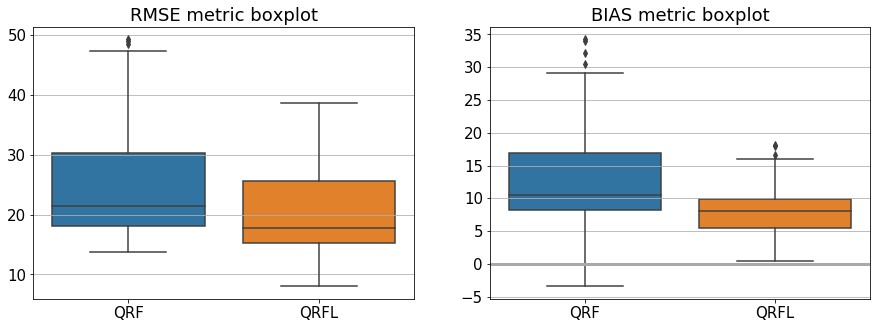

In [19]:
import seaborn as sns

#all_df_o=all_df.copy()
#choice = all_df["method"].unique()
#choice = ["QLR","GB","RFL","KNN"]
#choice = ["GB","RFL","KNN","QLR"]
#choice = ["GB","Arima"]
#choice = ["GB","GBL"]
choice = ["QRFL","QRF"]
#choice = ["QLR","RF"]
#choice = all_df["method"].unique()
all_dfg = all_df[all_df["method"].isin(choice)]

plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(15,5))


#_____________________________________________

plt.subplot2grid((1, 2), (0, 0))

plt.title("RMSE metric boxplot")

sns.boxplot(data=all_dfg[all_dfg["feature"]=="rmse"],x="method",y="value")

plt.gca().yaxis.grid(True)

plt.ylabel("")
plt.xlabel("")


#_____________________________________________


plt.subplot2grid((1, 2), (0, 1))

plt.title("BIAS metric boxplot")

sns.boxplot(data=all_dfg[all_dfg["feature"]=="bias"],x="method",y="value")
plt.axhline(y=0,color="darkgrey",linewidth=3)

plt.gca().yaxis.grid(True)


plt.ylabel("")
plt.xlabel("")

;

In [20]:
pd.options.display.float_format = '{:,.2f}'.format

In [21]:
choice = all_df["method"].unique()
choice = ["QLR","QGBL","QRFL","QKNNL","Arima"]
choice = ["QLR","QGB","QRFL","QKNNL"]
#choice = ["RFL","RF"]
#choice = ["QLR","RFL"]
#choice = ["GB","Arima"]
t_df=all_df[all_df["method"].isin(choice)]
t_df = t_df[t_df["feature"]=="crps"].copy()
r = t_df[t_df["horizon"].isin([1,12,13,14,20,37,45,55])].pivot(index='horizon', columns='method', values='value')
r=pd.concat([r,t_df.groupby("method").mean().T.loc[["value"]]])

In [22]:
r

method,QGB,QKNNL,QLR,QRFL
1,4.21,4.14,4.21,4.30
12,16.96,18.04,19.79,17.93
13,16.66,17.32,19.56,17.58
14,15.43,15.57,17.35,15.96
20,7.46,7.48,7.64,7.50
37,18.26,18.75,21.42,19.02
45,9.87,10.39,11.88,11.05
55,8.20,8.15,9.69,8.67
value,10.39,10.57,11.59,10.73


In [23]:
print(r.to_latex())

\begin{tabular}{lrrrr}
\toprule
method &   QGB &  QKNNL &   QLR &  QRFL \\
\midrule
1     &  4.21 &   4.14 &  4.21 &  4.30 \\
12    & 16.96 &  18.04 & 19.79 & 17.93 \\
13    & 16.66 &  17.32 & 19.56 & 17.58 \\
14    & 15.43 &  15.57 & 17.35 & 15.96 \\
20    &  7.46 &   7.48 &  7.64 &  7.50 \\
37    & 18.26 &  18.75 & 21.42 & 19.02 \\
45    &  9.87 &  10.39 & 11.88 & 11.05 \\
55    &  8.20 &   8.15 &  9.69 &  8.67 \\
value & 10.39 &  10.57 & 11.59 & 10.73 \\
\bottomrule
\end{tabular}



In [24]:
df_orig["NO2"]

NameError: name 'df_orig' is not defined